<a href="https://colab.research.google.com/github/shraishwarya/Digit-Classification-using-a-Simple-Neural-Network/blob/main/Digit_Classification_using_a_Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

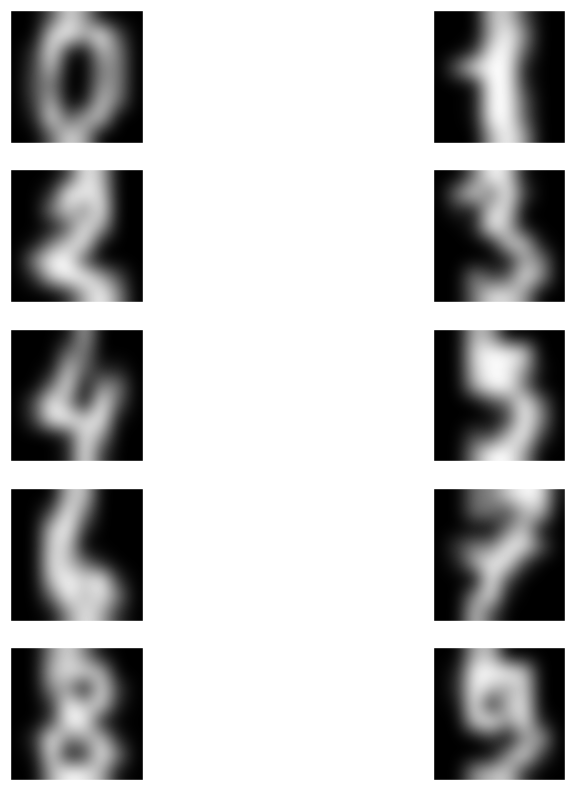

Epoch 1/20
33/33 [==============================] - 1s 9ms/step - loss: 1.9431 - acc: 0.4805 - val_loss: 0.6466 - val_acc: 0.8718
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.4674 - acc: 0.8735 - val_loss: 0.2276 - val_acc: 0.9402
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.2129 - acc: 0.9410 - val_loss: 0.1481 - val_acc: 0.9658
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1293 - acc: 0.9638 - val_loss: 0.0991 - val_acc: 0.9829
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0898 - acc: 0.9800 - val_loss: 0.1005 - val_acc: 0.9658
Epoch 6/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0584 - acc: 0.9886 - val_loss: 0.0882 - val_acc: 0.9829
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0365 - acc: 0.9962 - val_loss: 0.0850 - val_acc: 0.9744
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0285 - acc: 0.99

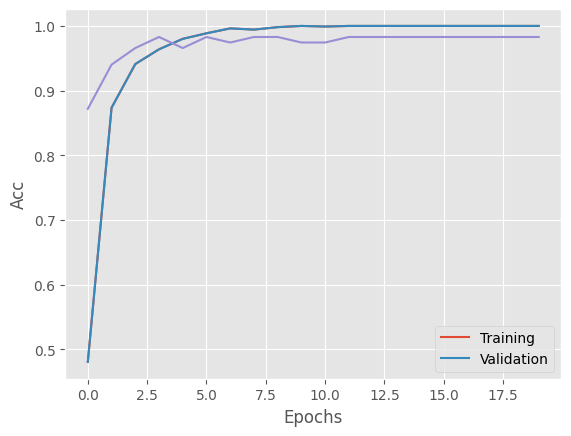

1/1 [==============================] - 0s 159ms/step


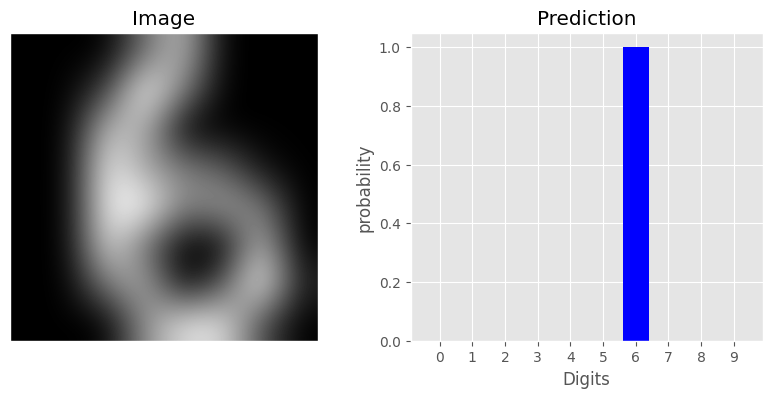

1/1 [==============================] - 0s 31ms/step


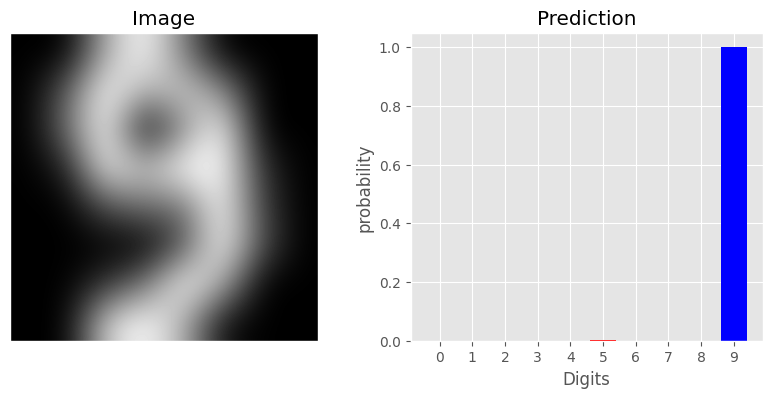

1/1 [==============================] - 0s 31ms/step


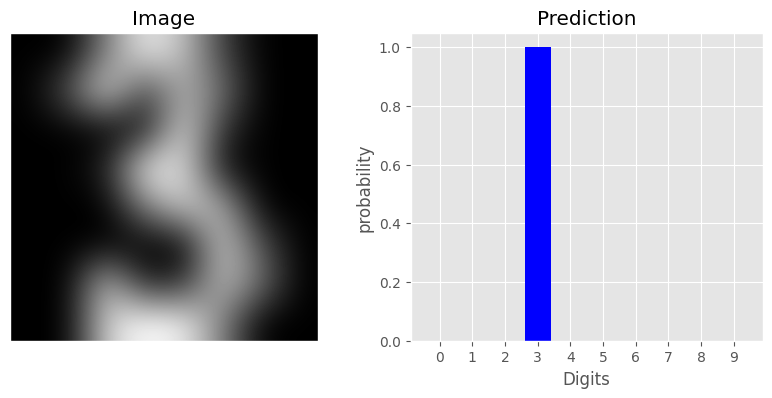

1/1 [==============================] - 0s 33ms/step


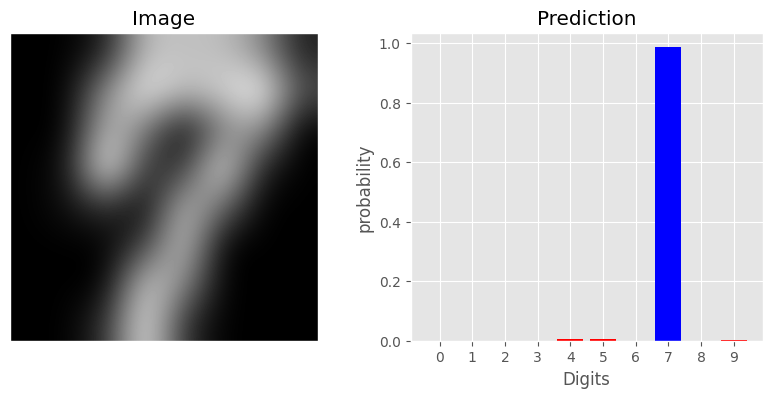

1/1 [==============================] - 0s 21ms/step


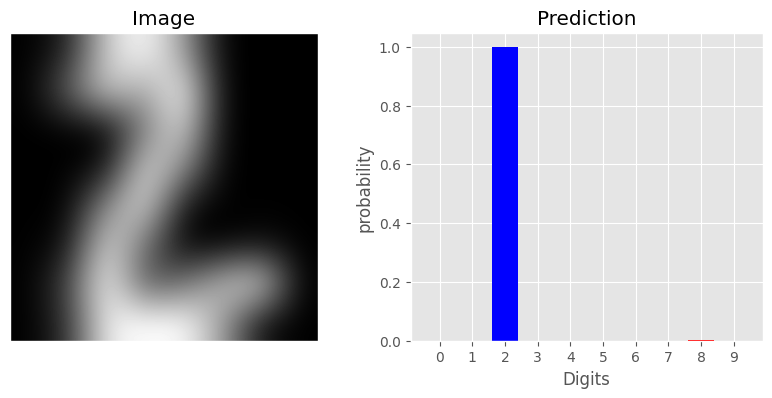

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.utils import to_categorical
df = load_digits().images
df.shape
target = load_digits().target
target.shape
df[0]
target[0]
plt.style.use('ggplot')
s=1
plt.figure(figsize=(10,10))
for i in range(10):
 plt.subplot(5,2,s)
 plt.imshow(df[i],cmap="gray",interpolation="bicubic")
 plt.xticks([])
 plt.yticks([])
 s +=1
plt.show()
# Classification
classes = [0,1,2,3,4,5,6,7,8,9]
# Split data for train and test
X = df
y = target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)
w,h = df[0].shape
X_train = X_train.reshape(len(X_train),w*h)
X_test = X_test.reshape(len(X_test),w*h)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
def Prediction_cat(model,image):
 global w,h
 pred = model.predict(image)
 color = ["red"]*10
 num = pred.argmax()
 color[num] = "blue"
 plt.figure(figsize=(10,4))
 plt.subplot(1,2,1)
 plt.imshow(image.reshape(w,h),cmap="gray",interpolation="bicubic")
 plt.xticks([])
 plt.yticks([])
 plt.title("Image")
 plt.subplot(1,2,2)
 plt.bar(x=[0,1,2,3,4,5,6,7,8,9],height=pred.flatten(),color=color)
 plt.xlabel("Digits")
 plt.ylabel("probability")
 plt.title("Prediction")
 plt.xticks([0,1,2,3,4,5,6,7,8,9])
 plt.show()
# Model
model = Sequential()
model.add(Dense(64,input_shape=X_train[0].shape,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
history = model.fit(X_train,y_train_cat,batch_size=32,epochs=20,validation_split=0.1)
result = model.evaluate(X_test.reshape(629,64),y_test_cat)
for i in range(len(model.metrics_names)):
 print(model.metrics_names[i],":",result[i])
 plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])
plt.show()
for i in range(5):
 Prediction_cat(model,X_test[i].reshape(1,-1))